In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data



In [2]:
start = '2012-01-01'
end = '2022-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624950
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898559
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624950
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898559
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0


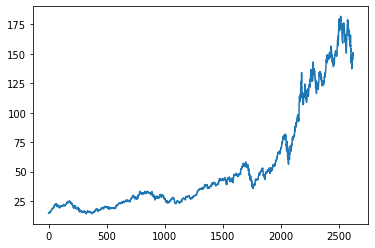

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2618    163.690500
2619    163.429700
2620    163.196800
2621    162.987200
2622    162.721299
Name: Close, Length: 2623, dtype: float64

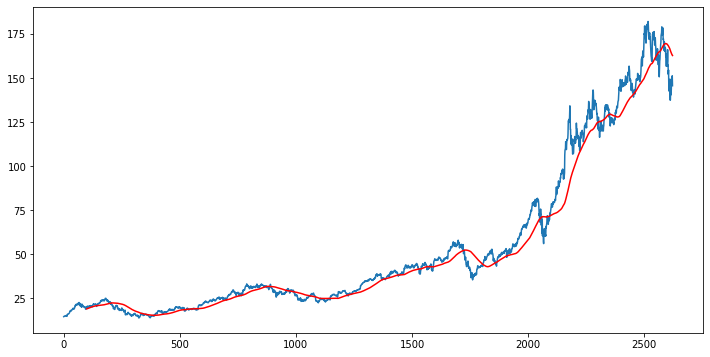

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2618    159.50000
2619    159.49870
2620    159.48665
2621    159.49175
2622    159.48795
Name: Close, Length: 2623, dtype: float64

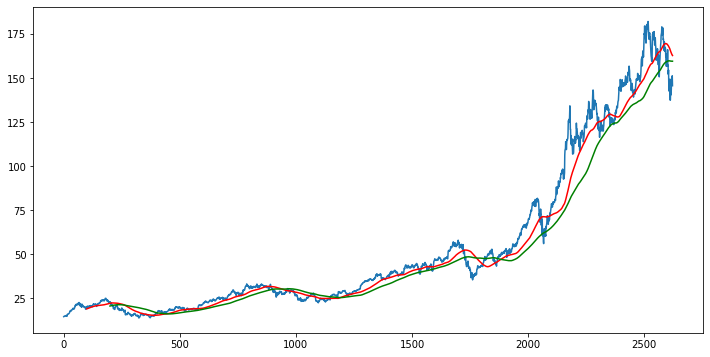

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(2623, 5)

In [12]:
# splitting data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1836, 1)
(787, 1)


In [13]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [14]:
data_testing.head()

,Close
1836,51.869999
1837,51.790001
1838,51.320000
1839,51.075001
1840,51.152500


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.83582935],
       [0.83997047],
       [0.84377123]])

In [26]:
data_training_array.shape

(1836, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(1, 100, 1)

In [ ]:
#ML model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [42]:
model = Sequential()

model.add(LSTM(Units = 50, activation = 'relu', return_sequences = True,
input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))



model.add(LSTM(Units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))



model.add(LSTM(Units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4))



model.add(LSTM(Units = 120, activation = 'relu'))

model.add(Dropout(0.5))


model.add(Dense(units = 1))

NameError: name 'Sequential' is not defined